Useful Additional Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

Generating a graph of 4 nodes

In [2]:
n = 5  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)

Drawing the Graph

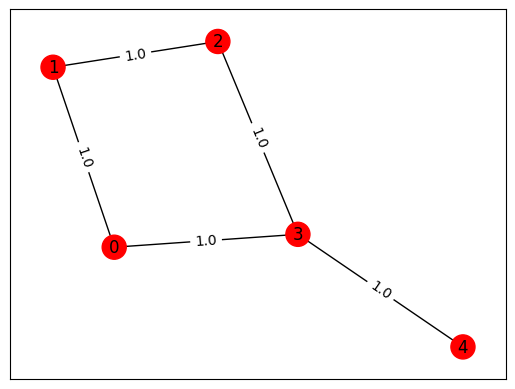

In [3]:
def graph(G, colors, pos):
    nx.draw_networkx(G, node_color=colors, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


graph(G, colors, pos)



Computing the weight matrix from random graph

In [4]:
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp !=0:
            w[i,j] = temp["weight"]
print(w)


[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0.]]


Classical Solution

case = [0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0] cost = 2.0
case = [0, 1, 0, 0, 0] cost = 2.0
case = [1, 1, 0, 0, 0] cost = 2.0
case = [0, 0, 1, 0, 0] cost = 2.0
case = [1, 0, 1, 0, 0] cost = 4.0
case = [0, 1, 1, 0, 0] cost = 2.0
case = [1, 1, 1, 0, 0] cost = 2.0
case = [0, 0, 0, 1, 0] cost = 3.0
case = [1, 0, 0, 1, 0] cost = 3.0
case = [0, 1, 0, 1, 0] cost = 5.0
case = [1, 1, 0, 1, 0] cost = 3.0
case = [0, 0, 1, 1, 0] cost = 3.0
case = [1, 0, 1, 1, 0] cost = 3.0
case = [0, 1, 1, 1, 0] cost = 3.0
case = [1, 1, 1, 1, 0] cost = 1.0
case = [0, 0, 0, 0, 1] cost = 1.0
case = [1, 0, 0, 0, 1] cost = 3.0
case = [0, 1, 0, 0, 1] cost = 3.0
case = [1, 1, 0, 0, 1] cost = 3.0
case = [0, 0, 1, 0, 1] cost = 3.0
case = [1, 0, 1, 0, 1] cost = 5.0
case = [0, 1, 1, 0, 1] cost = 3.0
case = [1, 1, 1, 0, 1] cost = 3.0
case = [0, 0, 0, 1, 1] cost = 2.0
case = [1, 0, 0, 1, 1] cost = 2.0
case = [0, 1, 0, 1, 1] cost = 4.0
case = [1, 1, 0, 1, 1] cost = 2.0
case = [0, 0, 1, 1, 1] cost = 2.0
case = [1, 0, 

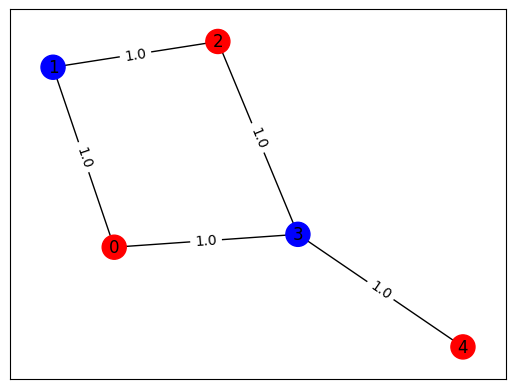

In [5]:
sol = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    #print(x)
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i, j] * x[i] * (1 - x[j])
    if sol < cost:
        sol = cost
        xlist = x
    print("case = " + str(x) + " cost = " + str(cost))

colors = ["r" if xlist[i] == 0 else "b" for i in range(n)]
graph(G, colors, pos)
print("\nBest solution = " + str(xlist) + " cost = " + str(sol))
